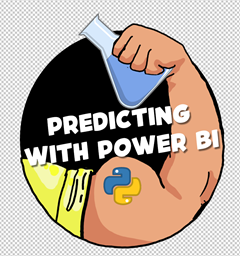


# Code voor Power BI (origineel)

In [ ]:
#Inladen van de pakketten
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re


#Hier gaan we de zinnen even opschonen, we halen de spaties voor de zin weg en de streepjes ook
dataset['Sentences'] = dataset['Sentences'].str.replace('-', '')
dataset['Sentences'] = dataset['Sentences'].str.lstrip()
dataset.head()

#Inladen van de sentiment analyse tool
SentimentAnalysis = SentimentIntensityAnalyzer()

#Nu gaat deze tool over de dataset heen 
#En bekijkt elke zin om er dan een sentiment score aan te geven
#Die score slaan we in een nieuwe kolom op. 
dataset['sentiment score'] = dataset['Sentences'].apply(lambda x: SentimentAnalysis.polarity_scores(x)['compound'])

# Code voor Power BI (met translation)

In [ ]:
#Inladen van de pakketten
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
import  pygoogletranslation
from  pygoogletranslation import Translator

#Hier gaan we de zinnen even opschonen, we halen de spaties voor de zin weg en de streepjes ook
dataset['Sentences'] = dataset['Sentences'].str.replace('-', '')
dataset['Sentences'] = dataset['Sentences'].str.lstrip()
dataset.head()

translatedList = []
for index, row in dataset.iterrows():
    # REINITIALIZE THE API
    translator = Translator()
    newrow = copy.deepcopy(row)
    try:
        # translate the 'text' column
        translated = translator.translate(row['Sentences'], dest='en')
        newrow['translated'] = translated.text
    except Exception as e:
        print(e)
        continue
    translatedList.append(newrow)

dataset_new = pd.DataFrame(translatedList)

#Inladen van de sentiment analyse tool
SentimentAnalysis = SentimentIntensityAnalyzer()

#Nu gaat deze tool over de dataset heen 
#En bekijkt elke zin om er dan een sentiment score aan te geven
#Die score slaan we in een nieuwe kolom op. 
dataset_new['sentiment score translated'] = dataset['translated'].apply(lambda x: SentimentAnalysis.polarity_scores(x)['compound'])